Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset into a DataFrame

In [3]:
df=pd.read_csv("/content/retail_store_inventory.csv")

Creating a copy of the dataframe

In [4]:
df_copy=df.copy

Understanding the data

In [5]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [6]:
df.tail()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
73095,2024-01-01,S005,P0016,Furniture,East,96,8,127,18.46,73.73,20,Snowy,0,72.45,Winter
73096,2024-01-01,S005,P0017,Toys,North,313,51,101,48.43,82.57,10,Cloudy,0,83.78,Autumn
73097,2024-01-01,S005,P0018,Clothing,West,278,36,151,39.65,11.11,10,Rainy,0,10.91,Winter
73098,2024-01-01,S005,P0019,Toys,East,374,264,21,270.52,53.14,20,Rainy,0,55.80,Spring
73099,2024-01-01,S005,P0020,Groceries,East,117,6,165,2.33,78.39,20,Rainy,1,79.52,Spring


In [7]:
df.shape

(73100, 15)

Data Overview

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [9]:
df.describe()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


Handling missing values

In [10]:
df.isna().sum()

,0
Date,0
Store ID,0
Product ID,0
Category,0
Region,0
Inventory Level,0
Units Sold,0
Units Ordered,0
Demand Forecast,0
Price,0


In [11]:
df.duplicated().sum()

0

Converting 'Date' column to datetime format and setting up as index

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
df.set_index('Date', inplace=True)

Dropping unwanted columns

In [14]:
df=df.drop(columns=['Store ID', 'Product ID', 'Inventory Level', 'Units Ordered',
                   'Demand Forecast', 'Price', 'Discount', 'Weather Condition',
                   'Competitor Pricing'])

Aggregate daily sales

In [15]:
daily_sales = df['Units Sold'].resample('D').sum()

Plot the sales data

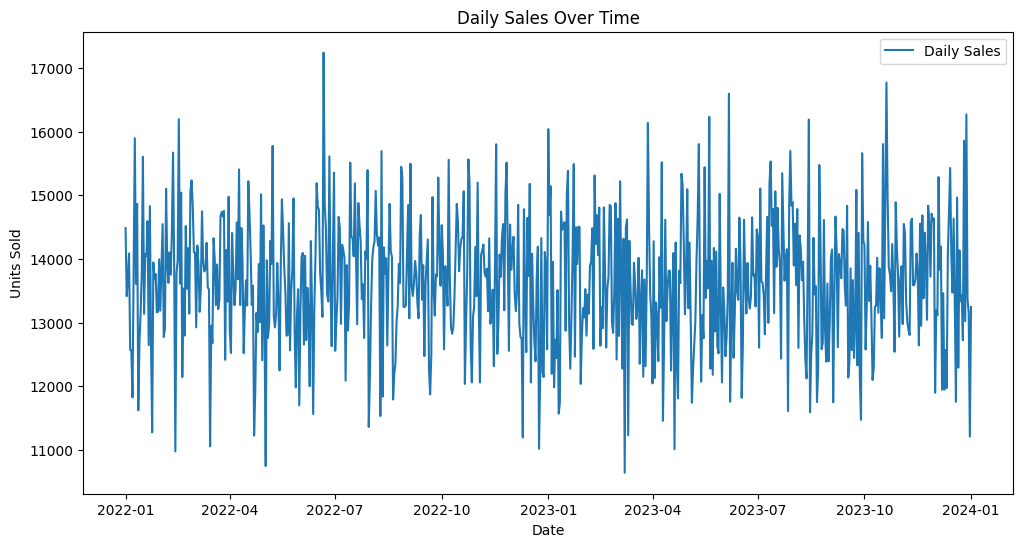

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Daily Sales')
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()

Visualizing sales distribution

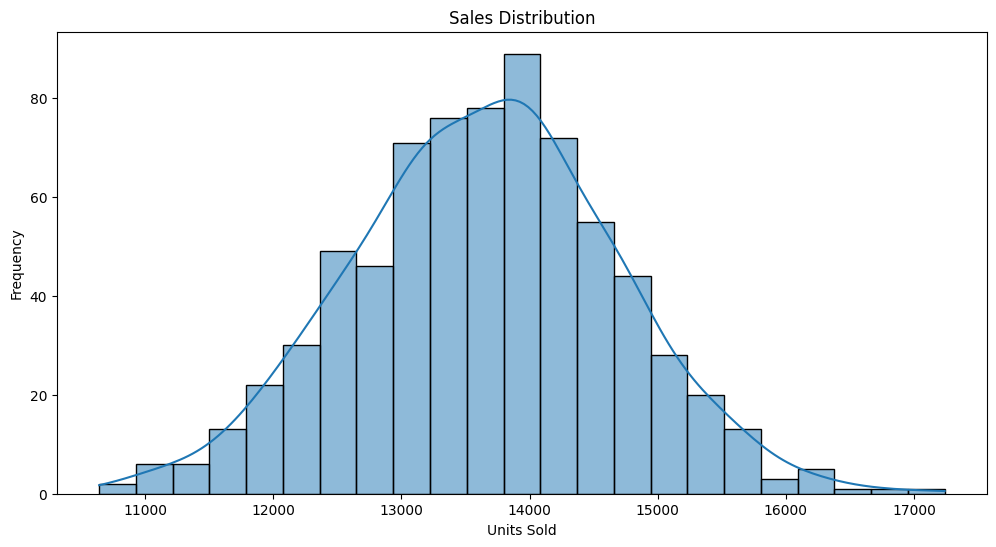

In [17]:
plt.figure(figsize=(12, 6))
sns.histplot(daily_sales, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.show()


 Sales Trend over time (Rolling Mean)

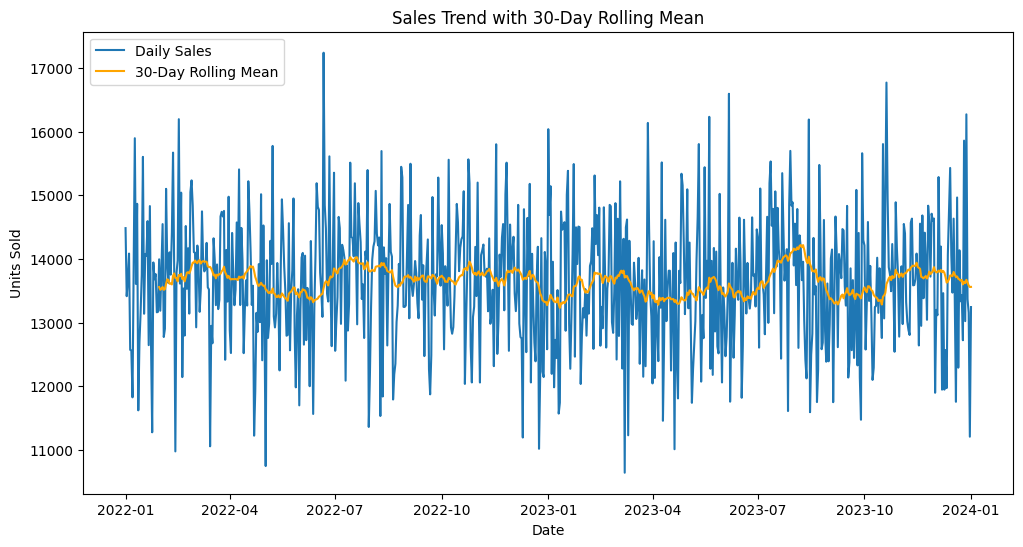

In [18]:
rolling_mean = daily_sales.rolling(window=30).mean()
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Daily Sales')
plt.plot(rolling_mean, label='30-Day Rolling Mean', color='orange')
plt.title('Sales Trend with 30-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()


Sales by Month

<ipython-input-19-8ca9e33b9bc2>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Units Sold'].resample('M').sum()


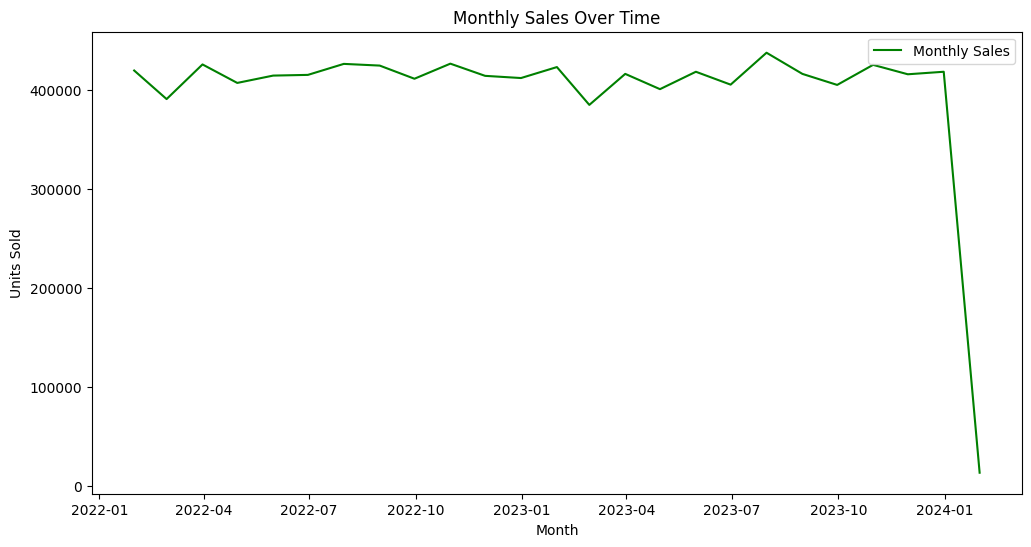

In [19]:
monthly_sales = df['Units Sold'].resample('M').sum()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Monthly Sales', color='green')
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.legend()
plt.show()

Heatmap of correlation matrix

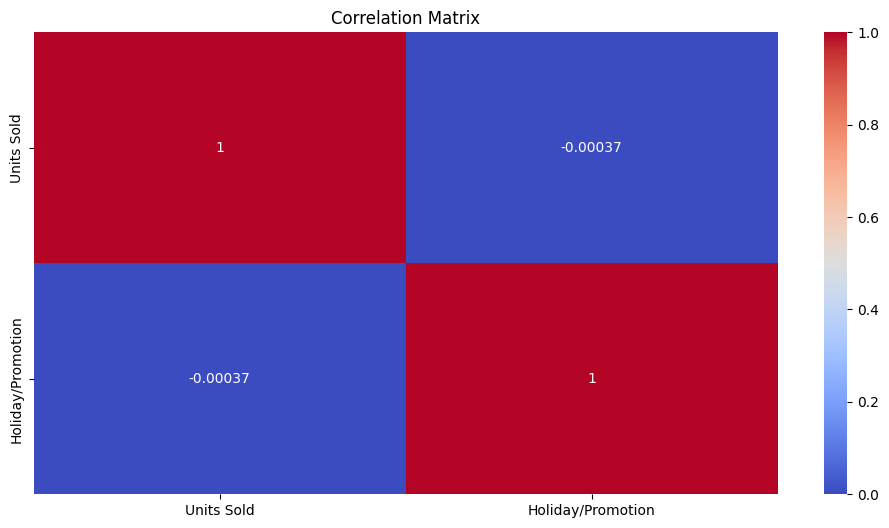

In [20]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

SARIMA Model (Seasonal ARIMA)

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima_model = SARIMAX(daily_sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
sarima_fit = sarima_model.fit(disp=False)

Forecast with SARIMA

In [22]:
sarima_forecast = sarima_fit.predict(start=len(daily_sales), end=len(daily_sales)+30, dynamic=False)

Plot SARIMA forecast

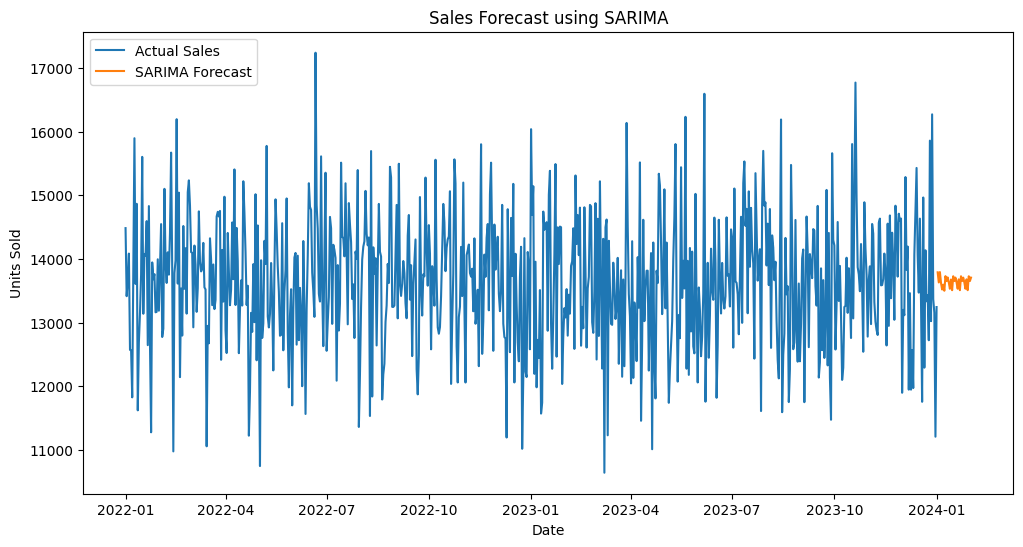

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Actual Sales')
plt.plot(sarima_forecast, label='SARIMA Forecast')
plt.title('Sales Forecast using SARIMA')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()

LSTM Model for Time Series Forecasting

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_sales = scaler.fit_transform(daily_sales.values.reshape(-1, 1))

Create time series dataset

In [25]:
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 30
X, y = create_dataset(scaled_sales, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

Split data into train and test sets

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Build the LSTM Model

In [27]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Train the LSTM model

In [28]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0605
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0286
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0233
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0253
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0271
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0238
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0265
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0248
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0245
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0258


Make predictions using the LSTM model

In [29]:
lstm_predictions = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Inverse transform predictions and actual values

In [30]:
lstm_predictions = scaler.inverse_transform(lstm_predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

Get the indices for the test set

In [31]:
test_indices = daily_sales.index[-len(y_test):]

Plot LSTM forecast

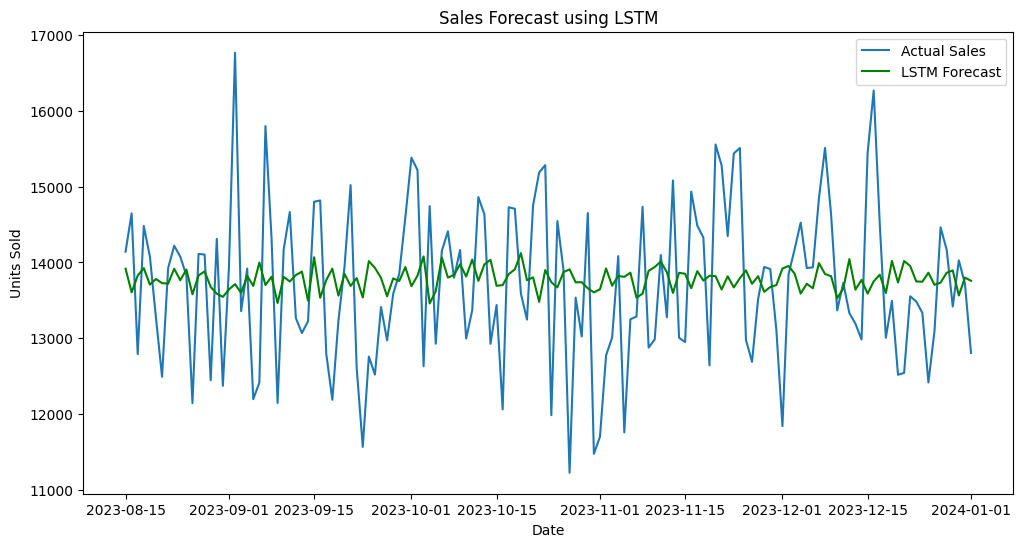

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(test_indices, y_test_actual, label='Actual Sales')
plt.plot(test_indices, lstm_predictions, label='LSTM Forecast', color='green')
plt.title('Sales Forecast using LSTM')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()

Model Evaluation - Performance Metrics

In [33]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error,mean_squared_error,mean_absolute_error
sarima_mse = mean_squared_error(daily_sales[-31:], sarima_forecast)
sarima_rmse = np.sqrt(sarima_mse)
sarima_mape = mean_absolute_percentage_error(daily_sales[-31:], sarima_forecast)
sarima_r2 = r2_score(daily_sales[-31:], sarima_forecast)
lstm_mse = mean_squared_error(y_test_actual, lstm_predictions)
lstm_rmse = np.sqrt(lstm_mse)
lstm_mape = mean_absolute_percentage_error(y_test_actual, lstm_predictions)
lstm_r2 = r2_score(y_test_actual, lstm_predictions)
print(f"SARIMA MSE: {sarima_mse}, RMSE: {sarima_rmse}, MAPE: {sarima_mape}, R²: {sarima_r2}")
print(f"LSTM MSE: {lstm_mse}, RMSE: {lstm_rmse}, MAPE: {lstm_mape}, R²: {lstm_r2}")

SARIMA MSE: 1520613.2559937714, RMSE: 1233.1314836601048, MAPE: 0.07505047218151739, R²: -0.029795622110777353
LSTM MSE: 1130694.4843038556, RMSE: 1063.3411890375805, MAPE: 0.064157372336966, R²: -0.036674146819767106


Final Comparison of Models

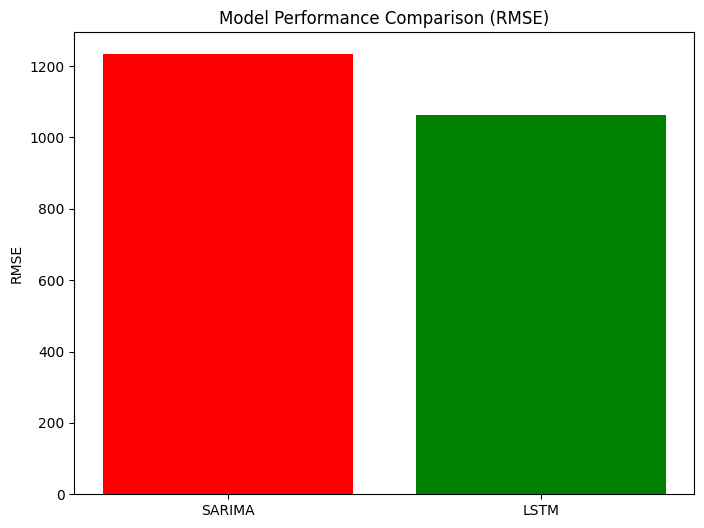

In [34]:
metrics = {'SARIMA': sarima_rmse,'LSTM': lstm_rmse}
plt.figure(figsize=(8, 6))
plt.bar(metrics.keys(), metrics.values(), color=['red', 'green'])
plt.title('Model Performance Comparison (RMSE)')
plt.ylabel('RMSE')
plt.show()


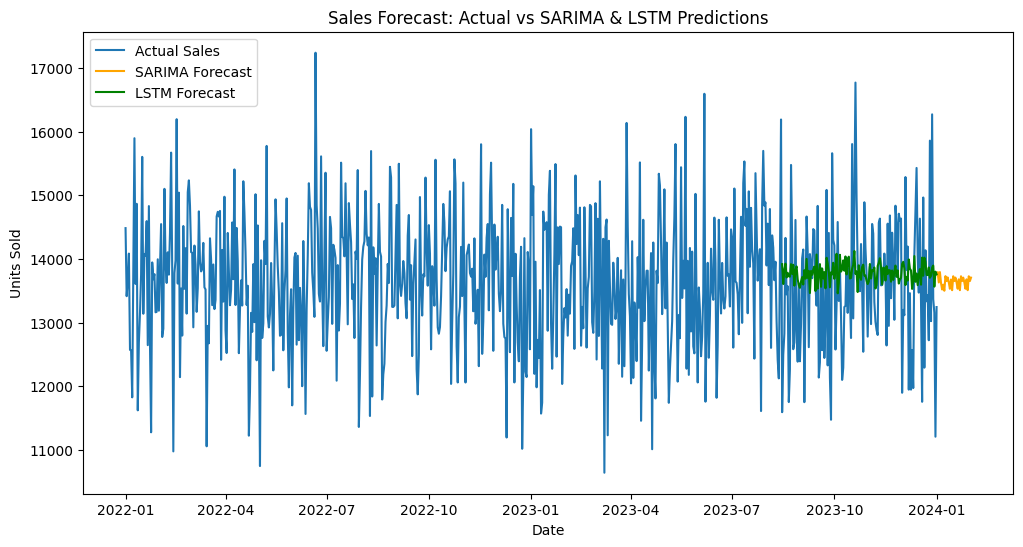

In [37]:
import matplotlib.pyplot as plt

# Assuming daily_sales contains actual sales data and sarima_forecast, lstm_predictions are forecasted values
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Actual Sales')
plt.plot(sarima_forecast, label='SARIMA Forecast', color='orange')
plt.plot(test_indices, lstm_predictions, label='LSTM Forecast', color='green')
plt.title('Sales Forecast: Actual vs SARIMA & LSTM Predictions')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()


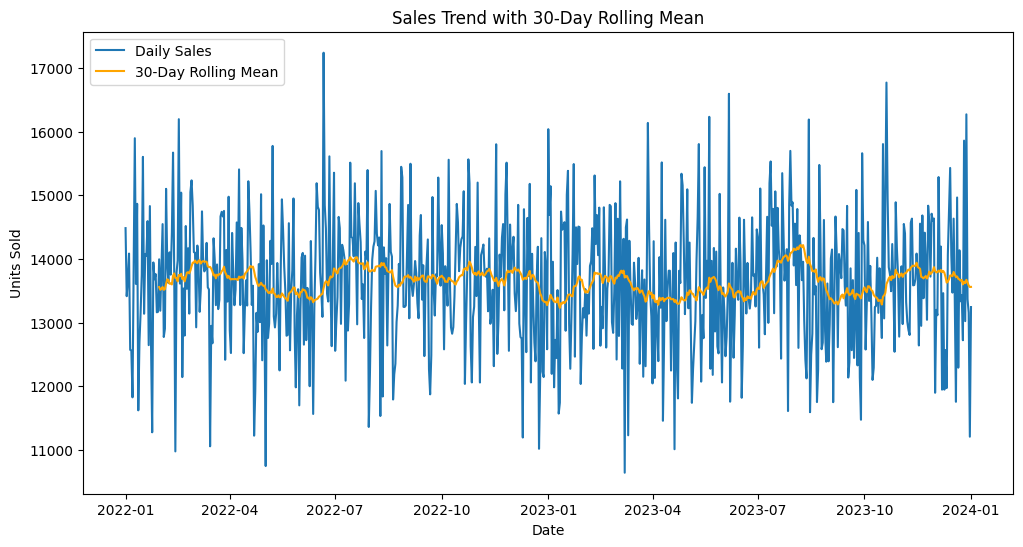

In [38]:
# Calculate the 30-day rolling mean
rolling_mean = daily_sales.rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Daily Sales')
plt.plot(rolling_mean, label='30-Day Rolling Mean', color='orange')
plt.title('Sales Trend with 30-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()


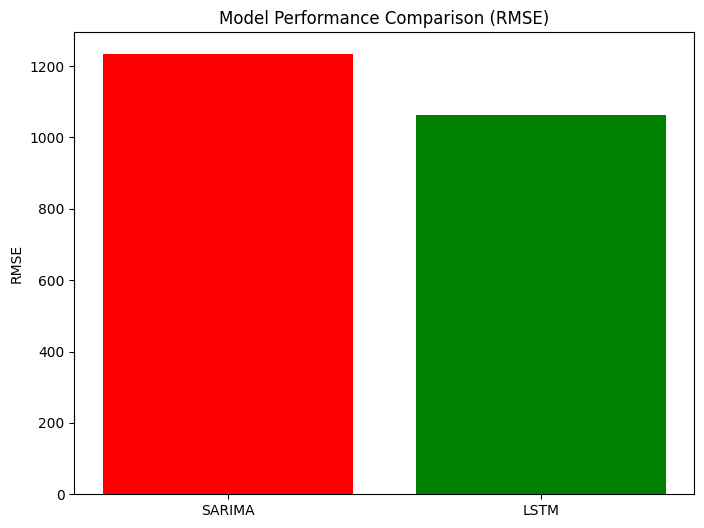

In [39]:
import numpy as np

# RMSE values for SARIMA and LSTM models
metrics = {'SARIMA': sarima_rmse, 'LSTM': lstm_rmse}

plt.figure(figsize=(8, 6))
plt.bar(metrics.keys(), metrics.values(), color=['red', 'green'])
plt.title('Model Performance Comparison (RMSE)')
plt.ylabel('RMSE')
plt.show()


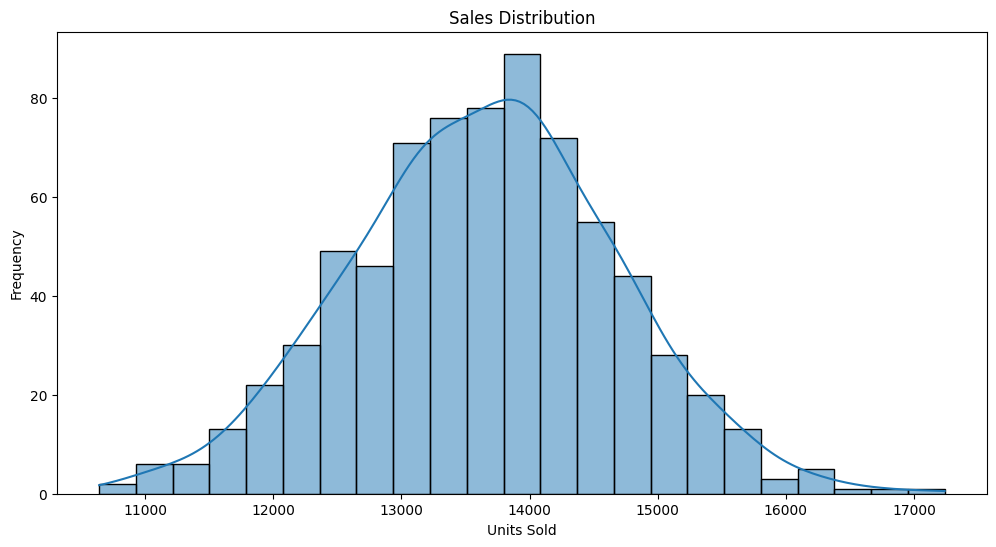

In [40]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(daily_sales, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.show()
